In [2]:
# IMPORTS
from __future__ import division
import numpy as np
from numpy import random as npr
from matplotlib import pyplot as plt
from pprint import pprint

%matplotlib notebook
np.set_printoptions(precision=5)
npr.seed(10)

## Exercice 1

### 1) Generate n=500 samples from a Beta distribution with parameter (α,β)=(2,5). Display the histogram of this sample with 25 bins.

<IPython.core.display.Javascript object>


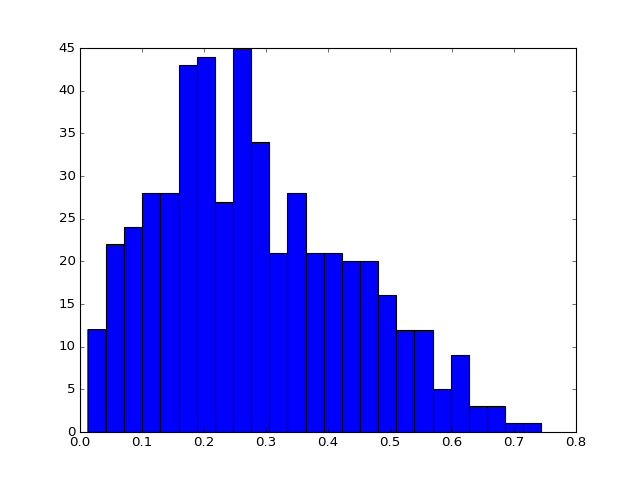

In [3]:
(a, b) = (2, 5)
n = 500

samples = npr.beta(a, b, n)
plt.hist(samples, bins=25, label='Samples from Beta distribution')
plt.show()

### 2) Generate n=500 independent random vectors (Xi1, Xi2) dans R² where each coordinate is independent of the other and both having a Beta distribution with parameter (α,β)=(2,5). Compute the mean vector µˆ(in R²). In the next we apply some bootstrap techniques to estimate the variance and the bias of µˆ.


In [4]:
# Stick 2 beta distributions together
X = list(zip(npr.beta(a, b, n), npr.beta(a, b, n)))
print("X[:10] = ", "\n\t  ".join("({x_i1:.4}, {x_i2:.4})".format(x_i1=x_i1, x_i2=x_i2) for x_i1, x_i2 in X[:10]))

mu_chap = np.mean(X, axis=0)
print("mu_chap = ", mu_chap)

X[:10] =  (0.6155, 0.1426)
	  (0.07744, 0.6446)
	  (0.2806, 0.1044)
	  (0.4264, 0.1248)
	  (0.1162, 0.482)
	  (0.03352, 0.3002)
	  (0.1527, 0.1467)
	  (0.05534, 0.2209)
	  (0.3379, 0.1344)
	  (0.4829, 0.08858)
mu_chap =  [ 0.28762  0.28151]


### 3) Compute B=500 bootstrap estimators of the mean µ_chap_star_1, ..., µ_chap_star_B (µ_chap_star_b in R²). On the same plot, represent the observed data, the estimated mean µ_char and the 500 bootstrap estimators of the mean µ_chap_star_b. Note that since µ_chap is in R², the variance is a (2x2) matrix

<IPython.core.display.Javascript object>


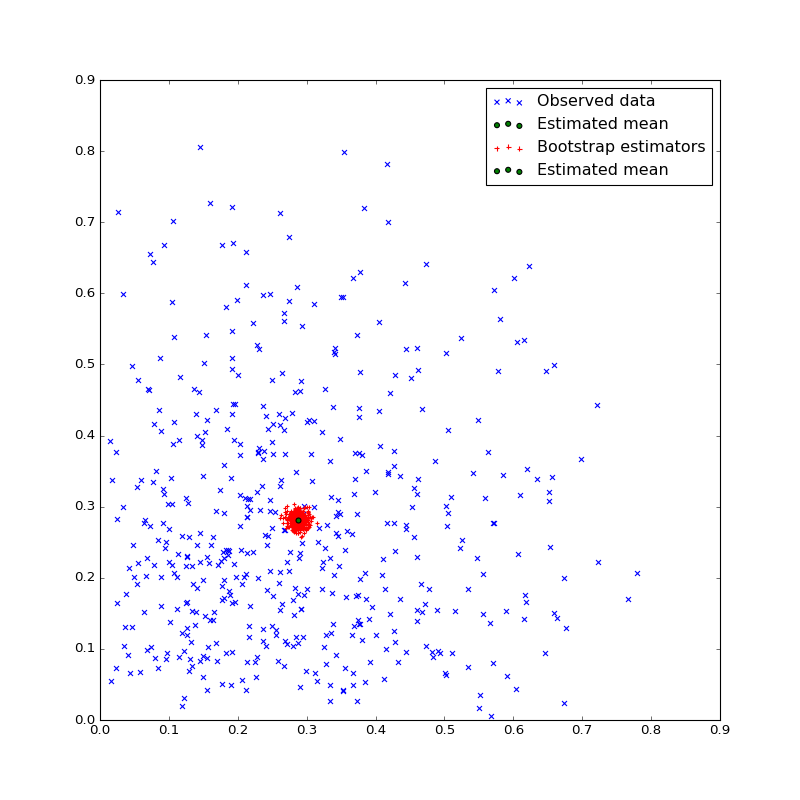

In [10]:
B = 500

# Bootstrap estimators of the mean
mu_chap_stars = [np.mean([X[i] for i in npr.randint(0, n, n)], axis=0) for _ in range(B)]

# For an array of tuples, retrieve the i-th item of each pair as a list
def a_i(a,i):
    return [m[i] for m in a]

# Initialize plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Plot the observed data
ax.scatter(a_i(X,0), a_i(X,1), c='b', marker='x', label='Observed data')

# Now, locate the estimated mean of the beta distributions
ax.scatter(mu_chap[0], mu_chap[1], c='g', marker='o', label='Estimated mean')

# Then plot the boostrap estimators of the mean
ax.scatter(a_i(bs_estimates,0), a_i(bs_estimates,1), c='r', marker='+', label='Bootstrap estimators')

# Finally, locate the estimated mean of the beta distributions
ax.scatter(mu_chap[0], mu_chap[1], c='g', marker='o', label='Estimated mean')

# There should be no negative values, so focus on the interesting part
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.legend(loc='upper right')
plt.show()


### 4) Give bootstrap and jackknife estimates of the bias and the variance of the mean estimator mu_chap


In [81]:
print("Bootstrap:")
bs_bias = np.sum(mu_chap_stars - mu_chap, axis=0) / B
print('biais de l\'estimateur de la moyenne:', bs_bias)

mu_star_bar = np.mean(mu_stars, axis=0)
bs_diff = np.subtract(mu_chap_stars, mu_star_bar)
bs_variance = bs_diff.T.dot(bs_diff) / B
print('covariance de l\'estimateur de la moyenne:', *bs_variance, '\n')


print("Jackknife:")
jk_samples = [X[:i] + X[i+1:] for i in range(len(X))]
jk_bias = np.sum(np.mean(jk_samples, axis=0) - mu_chap, axis=0) * (1 - 1/n)
print('biais de l\'estimateur de la moyenne:', jk_bias)

mu_minus_i = [np.mean(jk_samples[i], axis=0) for i in range(n)]
jk_diff = np.subtract(mu_minus_i, np.mean(mu_minus_i, axis=0))
jk_variance = jk_diff.T.dot(jk_diff) * (1 - 1/n)
print('covariance de l\'estimateur de la moyenne:', *jk_variance, '\n')


aspt_diff1 = np.subtract(X, mu_chap)
var_n_X = aspt_diff1.T.dot(aspt_diff1) / (n*(n-1))
print('var(X)/n = ', *var_n_X, '\n')

Bootstrap:
biais de l'estimateur de la moyenne: [-0.00043  0.00048]
covariance de l'estimateur de la moyenne: [  5.58781e-05  -3.36312e-07] [ -3.36312e-07   5.48501e-05] 

Jackknife:
biais de l'estimateur de la moyenne: [  1.26589e-14  -5.44583e-14]
covariance de l'estimateur de la moyenne: [  5.44333e-05  -3.95534e-07] [ -3.95534e-07   5.69234e-05] 

var(X)/n =  [  5.44333e-05  -3.95534e-07] [ -3.95534e-07   5.69234e-05] 



### 4) Give jackknife estimates of the bias and the variance of the mean estimator. Verify the formula

In [82]:
aspt_diff2 = np.subtract(X, mu_chap)
var_X = aspt_diff2.T.dot(aspt_diff2) / n
print('var(X) = ', *var_X, '\n')

var(X) =  [ 0.02716 -0.0002 ] [-0.0002  0.0284] 

